[View in Colaboratory](https://colab.research.google.com/github/takesi0627/deeplearningclass/blob/master/18M31415_report2.ipynb)

# Machine Learning: Intermediate report

+ JUAN Nien-Wu (18M31415)

Prepare an environment for running Python codes on Jupyter notebook. The most easiest way is to use [Google Colaboratory](https://colab.research.google.com/).

Write codes for the following three (and one optional) problems, and submit the notebook (`.ipynb`) as well as its HTML conversion (`.html`). *We do not accept a report in other formats (e.g., Word, PDF)*. Write a code at the specified cell in the notebook. One can add more cells if necessary.

These are the links to the sample codes used in the lecture:

+ [Binary classification](https://github.com/chokkan/deeplearningclass/blob/master/mlp_binary.ipynb)
+ [MNIST](https://github.com/chokkan/deeplearningclass/blob/master/mnist.ipynb)

## 1. Multi-class classification on MNIST

Train a model on the training set of MNIST, and report the accuracy of the model on the test set. One can use the same code shown in the lecture. Write a code here and show the output.

In [0]:
import gzip
import os
import sys
import struct
import numpy as np

def read_image(fi):
    magic, n, rows, columns = struct.unpack(">IIII", fi.read(16))
    assert magic == 0x00000803
    assert rows == 28
    assert columns == 28
    rawbuffer = fi.read()
    assert len(rawbuffer) == n * rows * columns
    rawdata = np.frombuffer(rawbuffer, dtype='>u1', count=n*rows*columns)
    return rawdata.reshape(n, rows, columns).astype(np.float32) / 255.0

def read_label(fi):
    magic, n = struct.unpack(">II", fi.read(8))
    assert magic == 0x00000801
    rawbuffer = fi.read()
    assert len(rawbuffer) == n
    return np.frombuffer(rawbuffer, dtype='>u1', count=n)

 
def image_to_vector(X):
    X = np.reshape(X, (len(X), -1))     # Flatten: (N x 28 x 28) -> (N x 784)
    return np.c_[X, np.ones(len(X))]    # Append 1: (N x 784) -> (N x 785)

  
if __name__ == '__main__':
    os.system('wget -N http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz')
    os.system('wget -N http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz')
    os.system('wget -N http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz')
    os.system('wget -N http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz')
    
    np.savez_compressed(
        'mnist',
        train_x=read_image(gzip.open('train-images-idx3-ubyte.gz', 'rb')),
        train_y=read_label(gzip.open('train-labels-idx1-ubyte.gz', 'rb')),
        test_x=read_image(gzip.open('t10k-images-idx3-ubyte.gz', 'rb')),
        test_y=read_label(gzip.open('t10k-labels-idx1-ubyte.gz', 'rb'))
    )




In [3]:
data = np.load('mnist.npz')
Xtrain = image_to_vector(data['train_x'])
Ytrain = data['train_y']
Xtest = image_to_vector(data['test_x'])
Ytest = data['test_y']

W = np.random.randn(10, 28*28+1)



eta = 0.001
#     liveloss = PlotLosses()
for t in range(100):
    # Structured perceptron for updating weights.
    num_correct_train = 0
    for x, y in zip(Xtrain, Ytrain):
        y_pred = np.argmax(np.dot(W, x))
        if y_pred != y:
            W[y] += x * eta
            W[y_pred] -= x * eta
        else:
            num_correct_train += 1

            
  
Y_true = []
Y_pred = []
# Evaluate and store the accuracy on the test set.
num_correct_test = 0
for x, y in zip(Xtest, Ytest):
    y_pred = np.argmax(np.dot(W, x))
    Y_true.append(y)
    Y_pred.append(y_pred)
    if y_pred == y:
        num_correct_test += 1

print('Accuracy: {:.4f} (test), {:.4f} (train)'.format(
    float(num_correct_test) / len(Ytest), 
    float(num_correct_train) / len(Ytrain)
    )) 


Accuracy: 0.8862 (test), 0.9008 (train)


## 2. Confusion matrix

Show a confusion matrix of the predictions of the model on the test set. This is an example of a confusion matrix.

![example](https://github.com/takesi0627/deeplearningclass/blob/master/assignment/example-confusion-matrix.png?raw=1)

Write a code here and show the confusion matrix.

In [4]:
!pip install sklearn

  Running setup.py bdist_wheel for sklearn ... - done
  Stored in directory: /content/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [106]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true, Y_pred)
print(cm)

[[ 936    0    5    4    3   12    8    3    4    5]
 [   1 1103    8    1    0    4    3    3   12    0]
 [  13   11  874   26    8   14   22   14   44    6]
 [   8    4   28  864    1   58    2   12   20   13]
 [   3    1    9    6  855    3   13    9    9   74]
 [  13    2    7   37   12  760   14    5   28   14]
 [  13    4   13    4    9   20  884    2    9    0]
 [   3   13   21   14    4    4    0  866    7   96]
 [   7    8   12   39   10   56   12    6  787   37]
 [   4    6    2   10   20    9    2   16    7  933]]


## 3. Top-3 confusing examples

Show the top three images where the model misrecognized their digits with strong confidences. More specifically, let $y_n$ and $\hat{y}_n$ the true and predicted, respectively, digits of the image $x_n$. We want to find three images with high $P(\hat{y}_n | x_n)$ when $y_n \neq \hat{y}_n$.

Please show $y_n$, $P(y_n | x_n)$, $\hat{y}_n$, and $P(\hat{y}_n | x_n)$. This is an example of an output for an image (you need this kind of outputs for top-three images).

![example](https://github.com/takesi0627/deeplearningclass/blob/master/assignment/example-confusing-sample.png?raw=1)

Write a code here and show the output.

True digit: 2(1.276545e-07); Predict digit: 9(0.9916901477683744)


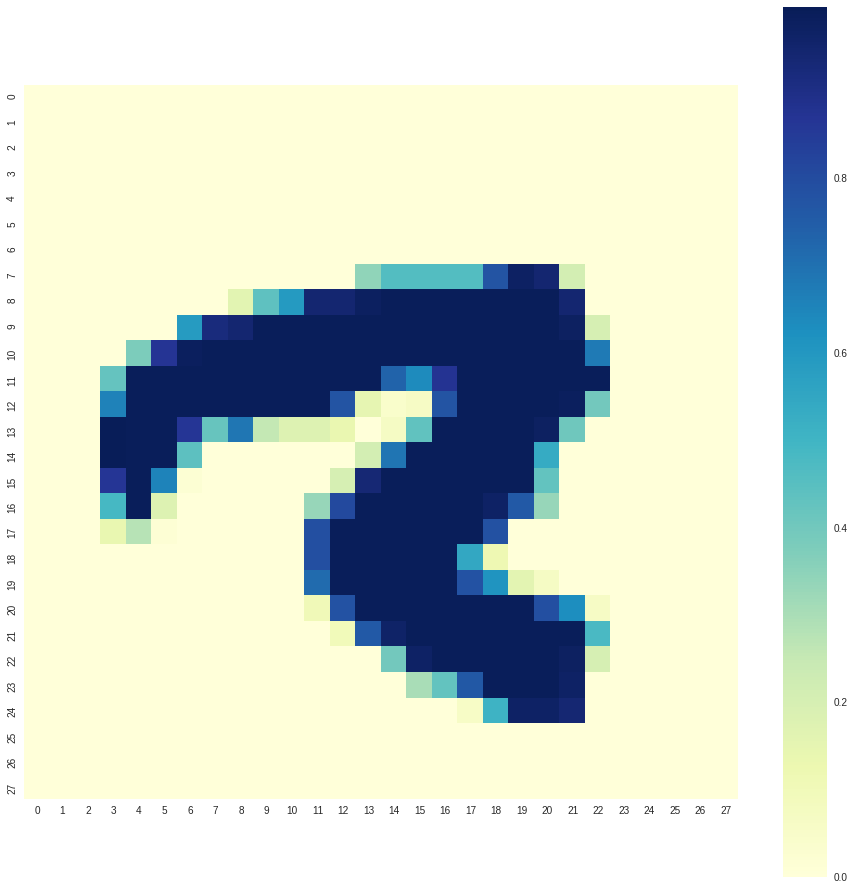

True digit: 9(1.033174e-05); Predict digit: 6(0.8770861699183048)


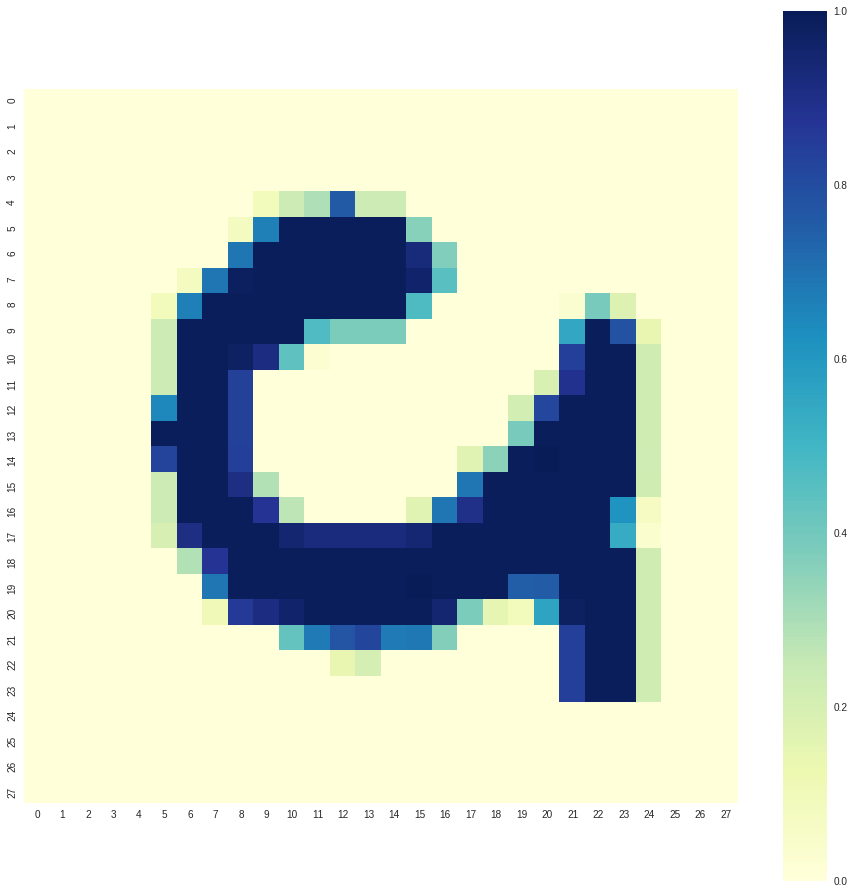

True digit: 1(1.572117e-05); Predict digit: 2(0.9539009248373324)


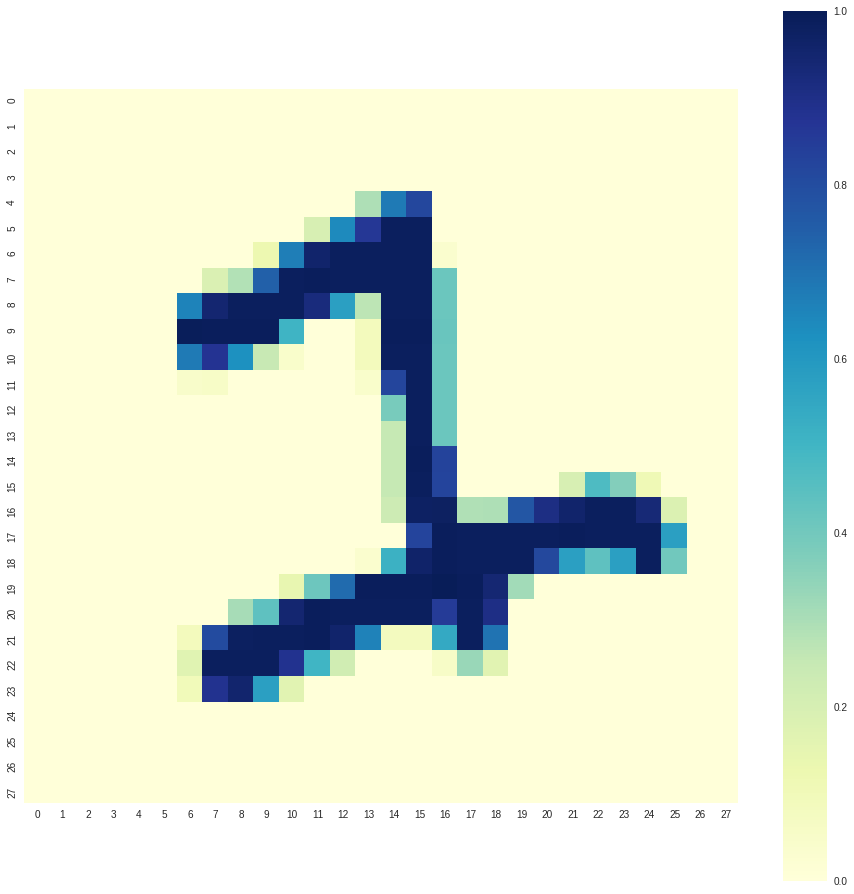

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns


def softmax (x):
  ex = np.exp(x - np.max(x))
  return ex / ex.sum(axis=0)

index = 0
for x, y in zip(data['test_x'], Ytest):
  X = np.reshape(x, -1)
  X = np.append(X, 1)
  y_pred = np.argmax(np.dot(W, X))
  
  accuracy = softmax(np.dot(W, X))
  if y_pred != y and accuracy[y] < 1e-4:
    print('True digit: {}({:e}); Predict digit: {}({})'.format(y, accuracy[y], y_pred, accuracy[y_pred]))
    f, ax = plt.subplots(figsize=(16, 16))
    sns.heatmap(x, annot=False, fmt='.1f', square=True, cmap="YlGnBu")
    plt.show()
    index += 1
    if index >= 3:
      break

## 4. Sample codes in other DL frameworks

(Advanced; optional) Implement one or more sample code(s) with a different deep learning framework (e.g., Chainer, TensorFlow, DyNet) corresponding to the slides 60-66 in binary classification. *When subitting an answer to this problem, please agree that some of the submitted codes will be distributed on the Web site to improve this lecture.*

In [72]:
!pip install chainer==5.0.0.b3

    100% |████████████████████████████████| 440kB 7.3MB/s 
  Running setup.py bdist_wheel for chainer ... - \ | / - done
  Stored in directory: /content/.cache/pip/wheels/2c/7b/86/b9c1fb8a6332dcf4ba11b30f6083f776a4a08ec91ed7f764c2
Successfully built chainer
  Found existing installation: chainer 5.0.0b2
    Uninstalling chainer-5.0.0b2:
      Successfully uninstalled chainer-5.0.0b2


# slide p.60

In [8]:
import chainer
import numpy as np
import chainer.functions as F
from chainer import Function, Variable

dtype = np.float32

import chainer
import numpy as np
import chainer.functions as F
from chainer import Function, Variable
x = Variable(np.array([1, 1, 1], dtype=dtype))
w = Variable(np.array([1.0, 1.0, -1.5], dtype=dtype))

loss = -F.log(F.sigmoid(np.dot(x, w)))
loss.backward()

print(loss)
print(w.grad)

variable(0.47407696)
[-0.37754062 -0.37754062 -0.37754062]


# slide p.61

In [9]:
import chainer
import numpy as np
from chainer import Variable
import chainer.functions as F

dtype = np.float32

# Training data for NAND
x = Variable(np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]], dtype=dtype))
y = Variable(np.array([[1], [1], [1], [0]], dtype=dtype))
w = Variable(np.random.rand(3, 1).astype(dtype=dtype))

eta = 0.5

for t in range(100):
    # y_pred = \sigma(x \cdot w)
    y_pred = F.sigmoid(F.matmul(x, w))
    ll = y * y_pred + (1 - y) * (1 - y_pred)
    loss = -F.sum(F.log(ll))
#     print(t, loss)

    loss.backward()

    with chainer.no_backprop_mode():
        w -= eta * w.grad
        w.cleargrad()

print(w)
print(F.sigmoid(F.matmul(x, w)))



variable([[-4.2538953]
          [-4.254267 ]
          [ 6.57286  ]])
variable([[0.9986042 ]
          [0.9104052 ]
          [0.91043556]
          [0.12616482]])


# p.62

In [10]:
import chainer
import numpy as np
from chainer import Variable
import chainer.functions as F

dtype = np.float32

# Training data for XOR
x = Variable(np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]], dtype=dtype))
y = Variable(np.array([[0], [1], [1], [0]], dtype=dtype))
w1 = Variable(np.random.rand(3, 2).astype(dtype=dtype), requires_grad=True)
w2 = Variable(np.random.rand(2, 1).astype(dtype=dtype), requires_grad=True)
b2 = Variable(np.random.rand(1, 1).astype(dtype=dtype), requires_grad=True)
ones = Variable(np.ones((4,1)).astype(dtype=dtype),requires_grad=True)

eta = 0.5
for t in range(1000):
    # y_pred = \sigma(w_2 \cdot \sigma(x \cdot w_1) + b_2)
    y_pred = F.sigmoid(F.matmul(F.sigmoid(F.matmul(x, w1)), w2) + F.matmul(ones, b2))
    ll = y * y_pred + (1 -y) * (1 - y_pred)
    loss = -F.sum(F.log(ll))
    # print(t, loss)
    loss.backward()

    with chainer.no_backprop_mode():
        # Update weights using SGD
        w1 -= eta * w1.grad
        w2 -= eta * w2.grad
        b2 -= eta * b2.grad

        # Clear the gradients for the next iteration
        w1.cleargrad()
        w2.cleargrad()
        b2.cleargrad()

print(w1)
print(w2)
print(b2)

print(F.sigmoid(F.matmul(F.sigmoid(F.matmul(x, w1)), w2) + F.matmul(ones, b2)))


variable([[ 7.054494   5.168355 ]
          [ 7.046379   5.1668777]
          [-3.186136  -7.909696 ]])
variable([[ 11.361548]
          [-12.154921]])
variable([[-5.263218]])
variable([[0.00802824]
          [0.99411047]
          [0.99411535]
          [0.00624782]])


# p.63

In [102]:
import chainer
import numpy as np
from chainer import Variable, Function
import chainer.functions as F
import chainer.links as L
from chainer import optimizers

def BCEWithLogitLoss(x, y):
    max_val = F.maximum(x, np.zeros(x.shape, dtype=dtype))
    return F.sum(x - x * y + max_val + F.log(F.exp(-max_val) + F.exp(-x - max_val)))

dtype = np.float32

# Training data for NAND
x = Variable(np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=dtype))
y = Variable(np.array([[1], [1], [1], [0]], dtype=dtype))

# Define a neural network using high-level modules.
model = chainer.Sequential(
    L.Linear(2, 1)
)

optimizer = optimizers.SGD(lr=0.5).setup(model)

for t in range(100):
    y_pred = model(x)
    # Binary cross-entropy loss after sigmoid function.
    loss = BCEWithLogitLoss(y_pred, y)
    # print(t, loss.data)
    model.cleargrads()
    loss.backward()

    with chainer.no_backprop_mode():
      for para in model.params():
        para.update()

for para in model.params():
    print(para)
print(F.sigmoid(model(x)))


variable W([[-4.244905  -4.2434964]])
variable b([6.558173])
variable([[0.99858356]
          [0.9100853 ]
          [0.9099699 ]
          [0.12672535]])


# p.64

In [103]:
import chainer
import numpy as np
import chainer.links as L
import chainer.functions as F
from chainer import optimizers

def BCEWithLogitLoss(x, y):
    max_val = F.maximum(x, np.zeros(x.shape, dtype=dtype))
    return F.sum(x - x * y + max_val + F.log(F.exp(-max_val) + F.exp(-x - max_val)))
    # return F.sum(F.maximum(x, np.zeros(x.shape, dtype=dtype)) - x * y + F.log(1 + F.exp(-F.absolute(x))))

dtype = np.float32

# Training data for XOR
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=dtype)
y = np.array([[0], [1], [1], [0]], dtype=dtype)

# Define a neural network usin high-level modules.
model = chainer.Sequential(
    L.Linear(2, 2),
    F.sigmoid,
    L.Linear(2, 1)
)

optimizer = optimizers.SGD(lr=0.5).setup(model)

for t in range(1000):
    y_pred = model(x)
    loss = BCEWithLogitLoss(y_pred, y)
    # print(t, loss)

    model.cleargrads()
    loss.backward()

    with chainer.no_backprop_mode():
        for para in model.params():
            para.update()


for para in model.params():
    print(para)
print(F.sigmoid(model(x)))

variable W([[ 5.2622476  5.263499 ]
            [-6.9554734 -6.963842 ]])
variable b([-8.154624   2.8295677])
variable W([[-11.67038   -11.4600115]])
variable b([5.6748614])
variable([[0.00576803]
          [0.9924635 ]
          [0.9924578 ]
          [0.00669932]])


# p.65

In [104]:
import chainer
import numpy as np
from chainer import Variable, Function
import chainer.functions as F
import chainer.links as L
from chainer import optimizers

def BCEWithLogitLoss(x, y):
    max_val = F.maximum(x, np.zeros(x.shape, dtype=dtype))
    return F.sum(x - x * y + max_val + F.log(F.exp(-max_val) + F.exp(-x - max_val)))

dtype = np.float32

# Training data for NAND
x = Variable(np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=dtype))
y = Variable(np.array([[1], [1], [1], [0]], dtype=dtype))

# Define a neural network using high-level modules.
model = chainer.Sequential(
    L.Linear(2, 1)
)

# Optimizer based on SGD (change "SGD" to "Adam" to use Adam)
optimizer = optimizers.SGD(lr=0.5).setup(model)

for t in range(100):
    y_pred = model(x)
    # Binary cross-entropy loss after sigmoid function.
    loss = BCEWithLogitLoss(y_pred, y)
    # print(t, loss.data)
    model.cleargrads()
    loss.backward()
    optimizer.update()

for para in model.params():
    print(para)
print(F.sigmoid(model(x)))



variable W([[-4.2393155 -4.239138 ]])
variable b([6.5507784])
variable([[0.99857306]
          [0.90983653]
          [0.909822  ]
          [0.12700811]])


# p.66

In [105]:
import chainer
import numpy as np
import chainer.links as L
import chainer.functions as F
from chainer import optimizers

def BCEWithLogitLoss(x, y):
    max_val = F.maximum(x, np.zeros(x.shape, dtype=dtype))
    return F.sum(x - x * y + max_val + F.log(F.exp(-max_val) + F.exp(-x - max_val)))
    # return F.sum(F.maximum(x, np.zeros(x.shape, dtype=dtype)) - x * y + F.log(1 + F.exp(-F.absolute(x))))

dtype = np.float32

# Training data for XOR
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=dtype)
y = np.array([[0], [1], [1], [0]], dtype=dtype)

# Define a neural network usin high-level modules.
model = chainer.Sequential(
    L.Linear(2, 2),
    F.sigmoid,
    L.Linear(2, 1)
)

optimizer = optimizers.SGD(lr=0.5).setup(model)

for t in range(1000):
    y_pred = model(x)
    loss = BCEWithLogitLoss(y_pred, y)
    # print(t, loss)
  
    model.cleargrads()
    loss.backward()
    optimizer.update()


for para in model.params():
    print(para)
print(F.sigmoid(model(x)))

variable W([[7.2339454 7.1400986]
            [5.1540627 5.138456 ]])
variable b([-3.2567258 -7.878225 ])
variable W([[ 11.537526 -12.389859]])
variable b([-5.331644])
variable([[0.00732976]
          [0.9946301 ]
          [0.99467987]
          [0.00566891]])
